# Import Liblaries

In [2]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
import numpy as np
from matplotlib.colors import ListedColormap

# Import Dataset

In [3]:
dataset = pd.read_csv('/content/naivebayes_knn_dataset/Naive-Bayes-Classification-Data.csv')
X = dataset.iloc[:, :-1].values  # Features: glucose, bloodpressure
y = dataset.iloc[:, -1].values    # Target variable: diabetes


#Split Dataset into Training Set and Test Set

In [4]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Feature Scaling

In [5]:
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

#  Training Set

In [6]:
knn_classifier = KNeighborsClassifier(n_neighbors=5)
knn_classifier.fit(X_train, y_train)

KNeighborsClassifier()

# Predicting the Test Set Results

In [7]:
y_pred = knn_classifier.predict(X_test)

# Making the Confusion Matrix

In [8]:
cm = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:")
print(cm)

Confusion Matrix:
[[90  3]
 [ 7 99]]


# Define the yellow and purple colormap

In [9]:
custom_cmap = ListedColormap(['#FFFF00', '#0000FF'])

# Visualising the Training Set, Test Set, & Predicted Results

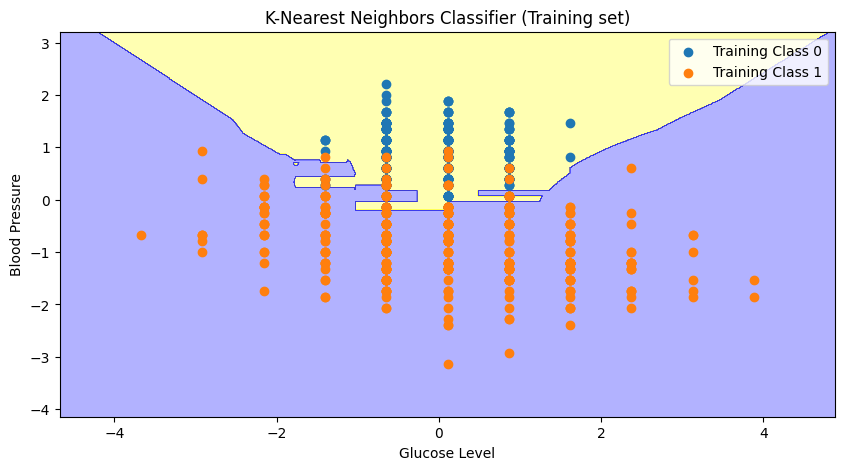

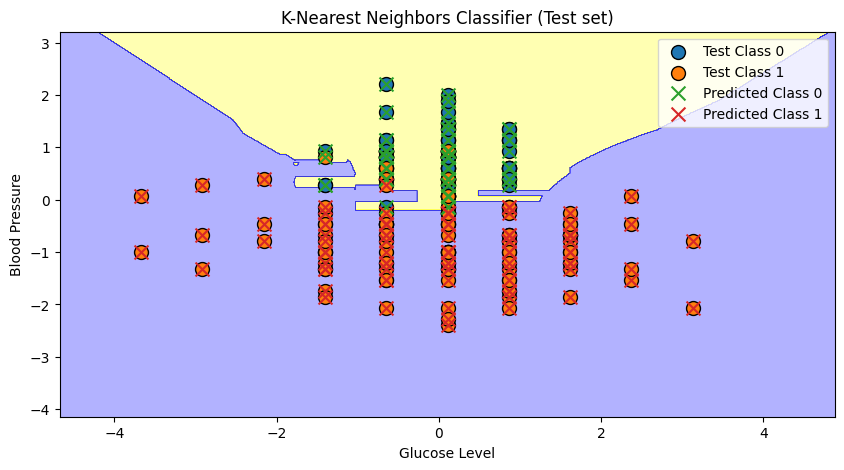

In [15]:
x_min, x_max = X_train[:, 0].min() - 1, X_train[:, 0].max() + 1
y_min, y_max = X_train[:, 1].min() - 1, X_train[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.01), np.arange(y_min, y_max, 0.01))

Z = knn_classifier.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)

plt.figure(figsize=(10, 5))
plt.contourf(xx, yy, Z, alpha=0.3, cmap=custom_cmap)

# Plot Training
for i in range(2):
    plt.scatter(X_train[y_train == i, 0], X_train[y_train == i, 1], label=f'Training Class {i}')

plt.title('K-Nearest Neighbors Classifier (Training set)')
plt.xlabel('Glucose Level')
plt.ylabel('Blood Pressure')
plt.legend()
plt.show()

# Test set Result
Z_test = knn_classifier.predict(np.c_[xx.ravel(), yy.ravel()])
Z_test = Z_test.reshape(xx.shape)

plt.figure(figsize=(10, 5))
plt.contourf(xx, yy, Z_test, alpha=0.3, cmap=custom_cmap)

# Plot test points with true labels
for i in range(2):
    plt.scatter(X_test[y_test == i, 0], X_test[y_test == i, 1], label=f'Test Class {i}', edgecolor='black', s=100)


for i in range(2):
    plt.scatter(X_test[y_pred == i, 0], X_test[y_pred == i, 1], label=f'Predicted Class {i}', marker='x', s=100)

# Plot the predicted results
plt.title('K-Nearest Neighbors Classifier (Test set)')
plt.xlabel('Glucose Level')
plt.ylabel('Blood Pressure')
plt.legend()
plt.show()